In [3]:
import matplotlib.pyplot as plt
import numpy as np

from laurel import graph_utils, mdp

In [7]:
num_hubs = 10  # Number of depots in the network.
timesteps = 10  # Number of time steps.
num_parcels = 20  # Number of parcels in the network.

# Create middle-mile environment and initialize state.
env = mdp.MiddleMileMDP(
    num_hubs=num_hubs,
    timesteps=timesteps,
    num_trucks_per_step=num_hubs,
    max_truck_duration=timesteps // 2,
    num_parcels=num_parcels,
    mean_route_length=timesteps // 2,
    cut_capacities=1
)
rng = np.random.default_rng(42)
state, _ = env.reset(rng)

Deliveries: 18 / 20


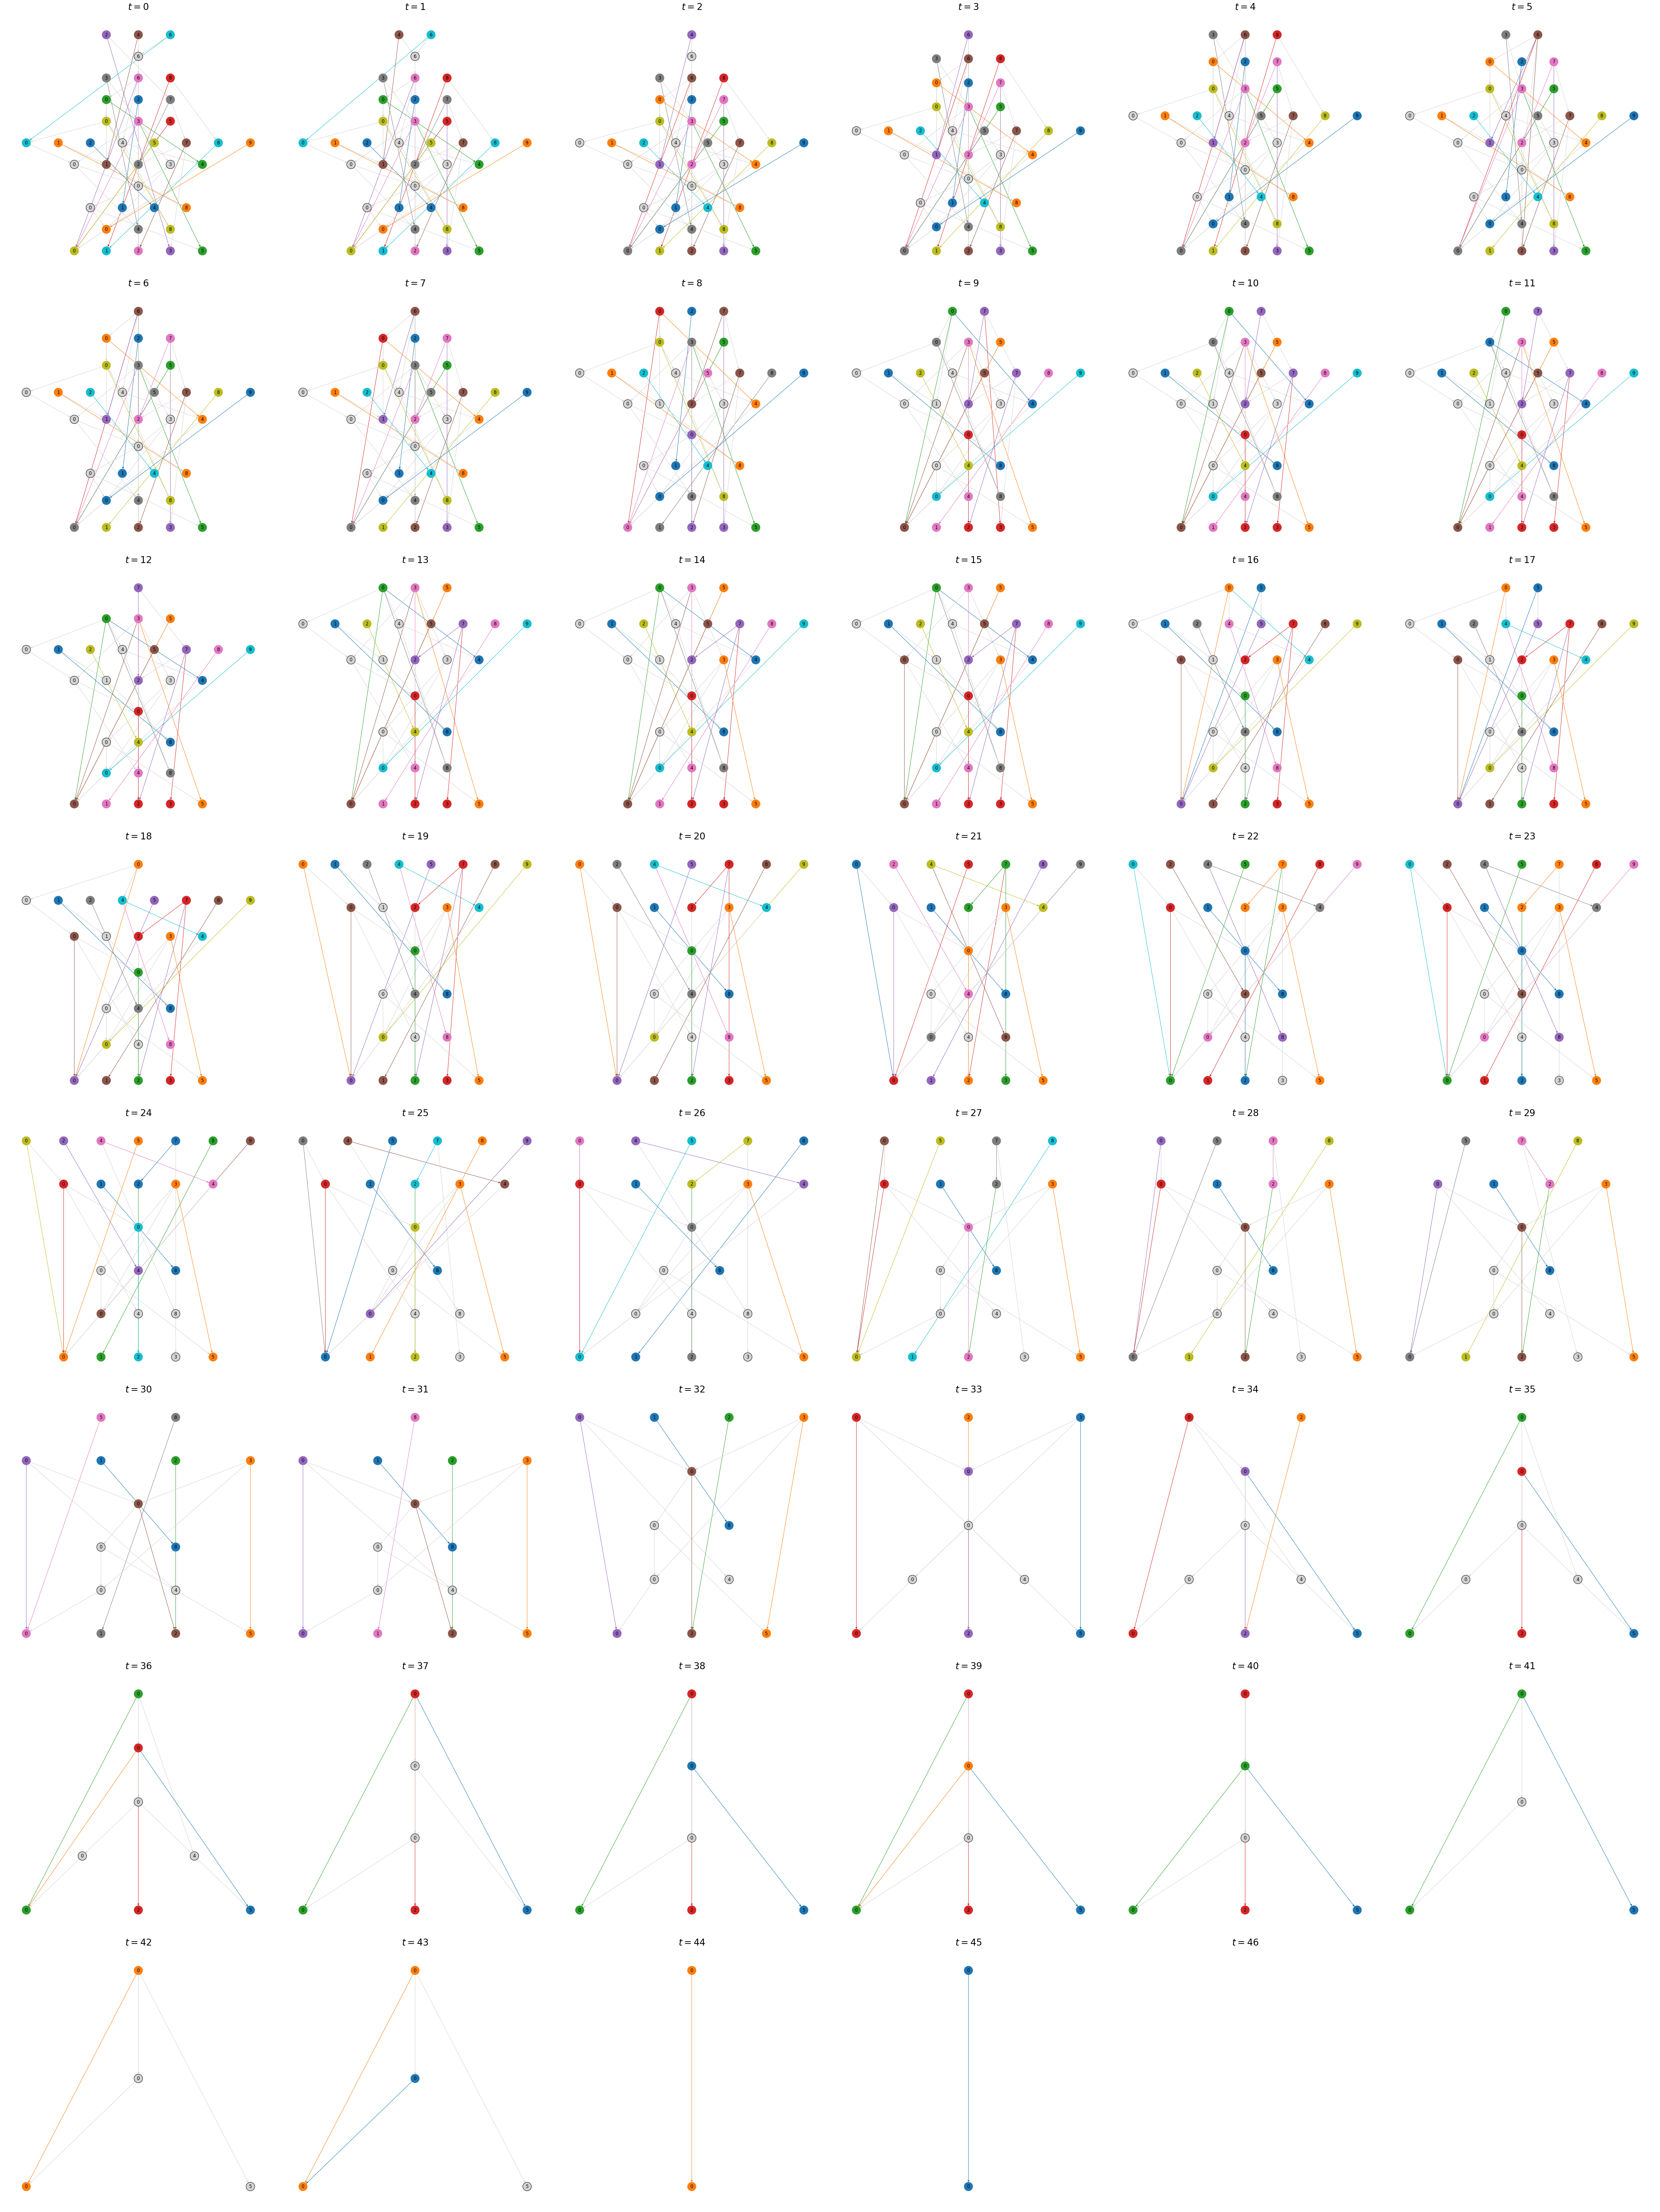

In [8]:
# Simulate MDP.
states = [state]
deliveries = 0
iterations = 0
while True:
  iterations += 1
  # Get next parcel and available trucks.
  state, parcel, trucks = env.get_actions(state)
  if parcel is None:
    break

  # Put parcel onto random truck, get next state.
  truck = rng.choice(trucks)
  state, delivery, _ = env.step(parcel, truck, state)
  states.append(state)
  deliveries += delivery

print(f"Deliveries: {deliveries} / {num_parcels}")

# Plot simulation.
cols = 6
rows = int(np.ceil(iterations / cols))
plt.rcParams['axes.titlesize'] = 24
fig, ax = plt.subplots(
    rows,
    cols,
    figsize=(10 * cols, 10 * rows),
    constrained_layout=True,
    # dpi=20
)
ax = ax.ravel()
for a in ax:
  a.set_axis_off()
for i, state in enumerate(states):
  ax[i].set_title(f"$t = {i}$")
  graph_utils.draw_network(state, ax[i])